In [1]:
import numpy as np
import pandas as pd

### clean clean dataset

In [114]:
clean = pd.read_csv("/Users/anab/Documents/MS_UCDavis/STA208/project/STA_208/data/clean.csv")

In [115]:
from Functions import Cleaning_Functions
fun = Cleaning_Functions()

In [116]:
clean  = fun.delete_id_columns(clean) 
clean = fun.replace_NAN_with_na(clean)
clean = fun.entry_to_lowercase(clean)
clean = fun.remove_underscores_spaces(clean)
clean = fun.impute_data(clean)
clean = fun.convert_to_categorical(clean)
clean = clean.drop("continent", axis = 1)

In [130]:
clean.columns

Index(['crop_count', 'crop_name_1', 'crop_harvest_1', 'crop_intercrop_1',
       'YEAR', 'Country', 'HHsizemembers', 'HHsizeMAE', 'HouseholdType',
       'Head_EducationLevel', 'LandOwned', 'LandCultivated',
       'LivestockHoldings', 'NrofMonthsFoodInsecure', 'PPI_Threshold',
       'PPI_Likelihood', 'HFIAS_status', 'score_HDDS_GoodSeason',
       'score_HDDS_farmbasedGoodSeason', 'score_HDDS_purchasedGoodSeason',
       'score_HDDS_BadSeason', 'score_HDDS_farmbasedBadSeason',
       'score_HDDS_purchasedBadSeason', 'TVA_USD_PPP_pmae_pday',
       'total_income_USD_PPP_pHH_Yr', 'offfarm_income_USD_PPP_pHH_Yr',
       'farm_income_USD_PPP_pHH_Yr', 'value_farm_produce_USD_PPP_pHH_Yr',
       'crop_sales_USD_PPP_pHH_Yr', 'value_crop_produce_USD_PPP_pHH_Yr',
       'value_crop_consumed_USD_PPP_pHH_Yr',
       'livestock_prodsales_USD_PPP_pHH_Yr',
       'value_livestock_production_USD_PPP_pHH_Yr',
       'value_livestock_prod_consumed_USD_PPP_pHH_Yr', 'Market_Orientation',
       'Livest

## Ridge regre y = market orientation

In [117]:
market_data, pred_market = fun.drop_response_rows_with_NAs(clean, "Market_Orientation", "PPI_Likelihood") #2
market_data.YEAR = market_data.YEAR.astype('category')

In [118]:
# market_data = fun.delete_id_columns(clean) #1
# market_data, pred_market = fun.drop_response_rows_with_NAs(market_data, "Market_Orientation", "PPI_Likelihood") #2
# market_data = fun.replace_NAN_with_na(market_data) #3
# market_data = fun.entry_to_lowercase(market_data) #4
# market_data = fun.remove_underscores_spaces(market_data) #5
# market_data = fun.convert_to_categorical(market_data) #6
# market_data = fun.impute_data(market_data)

In [119]:
def standarize_data(df):
    
    """
    Input: a dataset
    action: returns numeric column values scaled by mean and standard deviation
    """
    numeric_data = df.select_dtypes(include=['float64', 'int64'])
    for i in numeric_data.columns:
        df[i] = (df[i] - df[i].mean())/df[i].std()
    return df

In [120]:
market_data = standarize_data(market_data)

In [111]:
#market_data.dtypes

## Ridge Regression 

In [121]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### 1. create dummy

In [122]:
def get_dummyXs_y(df, y_var):
    
    y = df[y_var]
    X  = df.drop(y_var, axis = 1)
    X_cat = X.select_dtypes(include = ["category", "O"])
    X_num = X.select_dtypes(include=['float64', 'int64'])
    
    X_cat_dummy = pd.get_dummies(X_cat)
    newX = pd.concat([X_num, X_cat_dummy], axis = 1)
    
    return newX, y

In [123]:
X_market = get_dummyXs_y(market_data, "Market_Orientation")[0]
y_market = get_dummyXs_y(market_data, "Market_Orientation")[1]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_market,y_market, test_size = 0.3, random_state = 2021)


In [125]:
alpha_set = np.arange(100,800,10)
ridge_cv=RidgeCV(alphas=alpha_set, store_cv_values = True, fit_intercept = False)
model_cv=ridge_cv.fit(X_train,y_train)
model_cv.alpha_

420

In [126]:
cv_per_alpha = np.mean(model_cv.cv_values_, axis = 0)

In [127]:
cv_df = pd.DataFrame({'alpha': alpha_set, 'MSPE': cv_per_alpha})

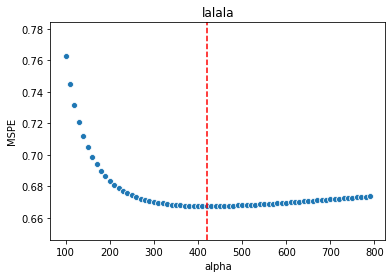

In [128]:
sns.scatterplot(data = cv_df, x = "alpha", y = "MSPE").set_title('lalala')
plt.axvline(x=420, c="red", linestyle = "dashed")


In [129]:
#refit model with alpha =3 and get score
rir = Ridge(alpha = model_cv.alpha_)
rir.fit(X_train,y_train)
y_pred_ridge = rir.predict(X_test)
MSE_market = mean_squared_error(y_test,y_pred_ridge)
MSE_market

0.7479089429916279

In [131]:
rir.coef_

array([ 8.78107737e-03, -8.89213697e-03, -1.56934764e-02, -1.45642907e-02,
        1.32494655e-02, -1.47020845e-01, -1.43257927e-02,  1.43554025e-02,
       -7.43071483e-03,  3.33159318e-03, -3.59693066e-02, -4.26604651e-02,
       -1.27783535e-02,  1.22166142e-03,  1.55636802e-03,  6.67983629e-05,
        2.14094922e-03, -5.25360704e-04,  1.37709940e-03, -7.27085828e-04,
       -1.46729471e-01,  9.73492004e-02,  1.06068046e-02, -3.24704052e-02,
       -2.51226291e-01, -1.27271891e-04, -3.67127354e-04,  1.08649438e-02,
       -3.83987846e-02,  3.83987846e-02, -7.29887178e-03,  0.00000000e+00,
        6.16892406e-03, -9.93639834e-04, -5.24836983e-02, -2.37752669e-03,
        8.37277872e-03, -9.04577992e-03,  1.28832964e-02, -5.75537498e-02,
        1.01760348e-03,  8.65016839e-03,  2.14181271e-03, -4.84226841e-02,
        0.00000000e+00, -1.00074538e-02,  1.46030226e-02,  0.00000000e+00,
        3.86774857e-03,  3.10528486e-03,  1.51945042e-03, -7.45915094e-03,
       -2.76403296e-03,  

In [132]:
betas = rir.coef_
max5_index = [list(abs(betas)).index(x) for x in np.sort(abs(betas))[::-1][:20]]
min5_index = [list(abs(betas)).index(x) for x in np.sort(abs(betas))[:5]]

In [133]:
betas[max5_index]

array([-0.43114364, -0.25122629, -0.22516792,  0.20216511, -0.17053425,
        0.15064128, -0.14702084, -0.14672947,  0.11048972,  0.10934428,
        0.0973492 ,  0.08706602, -0.07411431,  0.07185343,  0.067186  ,
        0.06624847, -0.05870163, -0.05755375,  0.05599103,  0.0531248 ])

In [134]:
betas[min5_index]

array([0., 0., 0., 0., 0.])

In [135]:
X_train.columns[max5_index]

Index(['Country_tanzania', 'Livestock_Orientation', 'YEAR_2017',
       'Country_burkinafaso', 'Country_kenya', 'Country_mali',
       'LivestockHoldings', 'value_crop_consumed_USD_PPP_pHH_Yr',
       'Country_zambia', 'crop_name_1_greengram',
       'livestock_prodsales_USD_PPP_pHH_Yr', 'YEAR_2018', 'Country_laopdr',
       'YEAR_2015', 'Head_EducationLevel_none', 'YEAR_2016',
       'Country_nicaragua', 'crop_name_1_cassava', 'Country_costarica',
       'crop_harvest_1_na'],
      dtype='object')

In [136]:
feature_imp_mo  = pd.DataFrame([X_train.columns[max5_index], betas[max5_index]]).T
feature_imp_mo 

,0,1
0,Country_tanzania,-0.431144
1,Livestock_Orientation,-0.251226
2,YEAR_2017,-0.225168
3,Country_burkinafaso,0.202165
4,Country_kenya,-0.170534
5,Country_mali,0.150641
6,LivestockHoldings,-0.147021
7,value_crop_consumed_USD_PPP_pHH_Yr,-0.146729
8,Country_zambia,0.11049
9,crop_name_1_greengram,0.109344


## Ridge regression with y=PPI_Likelihood

In [138]:
ppi_data, pred_ppi = fun.drop_response_rows_with_NAs(clean,"PPI_Likelihood" ,"Market_Orientation") #2


In [127]:
clean  = fun.delete_id_columns(clean) 
clean = fun.replace_NAN_with_na(clean)
clean = fun.entry_to_lowercase(clean)
clean = fun.remove_underscores_spaces(clean)
clean = fun.impute_data(clean)
clean = fun.convert_to_categorical(clean)
clean

,crop_count,crop_name_1,crop_harvest_1,crop_intercrop_1,YEAR,Country,HHsizemembers,HHsizeMAE,HouseholdType,Head_EducationLevel,...,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,Gender_MaleControl,Gender_FemaleControl,continent
0,2.0,groundnut,na,na,2015,tanzania,4,3.32,single,primary,...,38.500640,0.000000,1.000000,0.049505,3650.565755,0.000000,0,0.000000,1.000000,africa
1,2.0,millet,na,na,2015,tanzania,10,5.85,together,primary,...,0.000000,0.000000,1.000000,0.000000,3632.448997,0.000000,4,0.499999,0.500001,africa
2,2.0,groundnut,na,na,2015,tanzania,5,4.32,together,illiterate,...,128.335467,0.000000,1.000000,0.129870,5314.779021,1750.000000,1,1.000000,0.000000,africa
3,2.0,cowpea,na,na,2015,tanzania,11,9.33,together,primary,...,0.000000,0.000000,1.000000,0.310907,257.234727,257.234727,0,0.999984,0.000016,africa
4,2.0,sesame,na,na,2015,tanzania,6,5.41,together,secondary,...,233.994961,23.102694,0.931377,0.695041,925.310354,22.070240,0,1.000000,0.000000,africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11957,3.0,maize,goodharvest,monoculture,2018,ghana,8,5.43,couple,primary,...,655.292919,0.000000,1.000000,0.779661,1615.869392,339.743848,7,0.629176,0.370824,africa
11958,5.0,maize,goodharvest,monoculture,2018,ghana,7,4.78,couple,noschool,...,0.000000,0.000000,1.000000,0.310907,355.648536,355.648536,5,1.000000,0.000000,africa
11959,2.0,maize,badharvest,intercrop,2018,ghana,4,3.20,mansingle,noschool,...,49.859244,0.000000,0.456522,0.456522,379.050204,276.284247,0,0.000000,1.000000,africa
11960,2.0,maize,badharvest,intercrop,2018,ghana,4,3.10,couple,noschool,...,0.000000,0.000000,1.000000,0.310907,693.504198,693.504198,0,1.000000,0.000000,africa


In [139]:
# ppi_data = fun.delete_id_columns(clean) #1
# ppi_data, pred_market = fun.drop_response_rows_with_NAs(ppi_data,"PPI_Likelihood" ,"Market_Orientation") #2
# ppi_data = fun.replace_NAN_with_na(ppi_data) #3
# ppi_data = fun.entry_to_lowercase(ppi_data) #4
# ppi_data = fun.remove_underscores_spaces(ppi_data) #5
# ppi_data = fun.convert_to_categorical(ppi_data) #6
# ppi_data = fun.impute_data(ppi_data)#7

In [140]:
ppi_data.YEAR = ppi_data.YEAR.astype('category')
ppi_data = standarize_data(ppi_data)

In [141]:
X_ppi = get_dummyXs_y(ppi_data, "PPI_Likelihood")[0]
y_ppi = get_dummyXs_y(ppi_data, "PPI_Likelihood")[1]

In [142]:
X_train_ppi, X_test_ppi, y_train_ppi, y_test_ppi = train_test_split(X_ppi ,y_ppi, test_size = 0.3, random_state = 2021)


In [143]:
alpha_set = np.arange(10,80,1)
ridge_cv_ppi=RidgeCV(alphas=alpha_set, store_cv_values = True, fit_intercept = False)
model_ppi_cv=ridge_cv_ppi.fit(X_train_ppi,y_train_ppi)
model_ppi_cv.alpha_

48

In [144]:
ppi_cv_per_alpha = np.mean(model_ppi_cv.cv_values_, axis = 0)
ppi_cv_df = pd.DataFrame({'alpha': alpha_set, 'MSPE': ppi_cv_per_alpha})

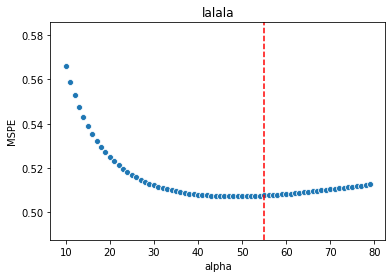

In [145]:
sns.scatterplot(data = ppi_cv_df, x = "alpha", y = "MSPE").set_title('lalala')
plt.axvline(x=55, c="red", linestyle = "dashed")

In [146]:
#refit model with alpha =3 and get score
ridge_ppi = Ridge(alpha = model_ppi_cv.alpha_)
ridge_ppi.fit(X_train_ppi,y_train_ppi)
y_pred_ridge_ppi = ridge_ppi.predict(X_test_ppi)
MSE_ppi = np.mean((y_pred_ridge_ppi-np.array(y_test_ppi))**2)
MSE_ppi

0.5452949897654191

In [148]:
#top 20 coeff/variable that are most important by abs value
betas_ppi = ridge_ppi.coef_
max5_index_ppi = [list(abs(betas_ppi)).index(x) for x in np.sort(abs(betas_ppi))[::-1][:20]]
min5_index_ppi = [list(abs(betas_ppi)).index(x) for x in np.sort(abs(betas_ppi))[:5]]

In [154]:
betas_ppi[max5_index_ppi]

array([ 1.44732316,  1.43027839, -1.00024503, -0.82115931,  0.80273365,
       -0.53769012, -0.40322078, -0.39439136, -0.39065783, -0.35620848,
        0.26009835,  0.25259397, -0.24119817,  0.24096484, -0.23133748,
        0.20271981, -0.19417709, -0.18888857, -0.18059029, -0.17389786])

In [150]:
betas_ppi[min5_index_ppi]

array([0., 0., 0., 0., 0.])

In [156]:
X_train.columns[max5_index_ppi]

Index(['Country_mali', 'Country_zambia', 'Country_guatemala', 'Country_ghana',
       'Country_malawi', 'Country_peru', 'Country_uganda',
       'crop_name_1_irishpotato', 'Country_india', 'Country_cambodia',
       'HHsizemembers', 'Head_EducationLevel_noschool', 'Country_drc',
       'Country_elsalvador', 'Head_EducationLevel_secondary',
       'Country_tanzania', 'Country_ethiopia', 'HHsizeMAE',
       'HouseholdType_together', 'Country_honduras'],
      dtype='object')

In [157]:
feature_imp_ppi  = pd.DataFrame([X_train.columns[max5_index_ppi], betas[max5_index_ppi]]).T
feature_imp_ppi

,0,1
0,Country_mali,0.150641
1,Country_zambia,0.11049
2,Country_guatemala,0.021191
3,Country_ghana,0.0247498
4,Country_malawi,0.0342796
5,Country_peru,0.0474055
6,Country_uganda,0.0377396
7,crop_name_1_irishpotato,0.00787746
8,Country_india,0.0374728
9,Country_cambodia,0.0260964


In [158]:
pd.concat([feature_imp_ppi, feature_imp_mo],axis = 1)

,0,1,0,1
0,Country_mali,0.150641,Country_tanzania,-0.431144
1,Country_zambia,0.11049,Livestock_Orientation,-0.251226
2,Country_guatemala,0.021191,YEAR_2017,-0.225168
3,Country_ghana,0.0247498,Country_burkinafaso,0.202165
4,Country_malawi,0.0342796,Country_kenya,-0.170534
5,Country_peru,0.0474055,Country_mali,0.150641
6,Country_uganda,0.0377396,LivestockHoldings,-0.147021
7,crop_name_1_irishpotato,0.00787746,value_crop_consumed_USD_PPP_pHH_Yr,-0.146729
8,Country_india,0.0374728,Country_zambia,0.11049
9,Country_cambodia,0.0260964,crop_name_1_greengram,0.109344


[primary, illiterate, secondary, literate, noschool, ..., postsecondary, informal, none, religiousschool, islamicschool]
Length: 27
Categories (27, object): [primary, illiterate, secondary, literate, ..., informal, none, religiousschool, islamicschool]

412

## drop countries 

In [153]:
clean = pd.read_csv("/Users/anab/Documents/MS_UCDavis/STA208/project/STA_208/data/clean.csv")
from Functions import Cleaning_Functions
fun = Cleaning_Functions()

clean  = fun.delete_id_columns(clean) 
clean = fun.replace_NAN_with_na(clean)
clean = fun.entry_to_lowercase(clean)
clean = fun.remove_underscores_spaces(clean)
clean = fun.impute_data(clean)
clean = fun.convert_to_categorical(clean)
clean

,crop_count,crop_name_1,crop_harvest_1,crop_intercrop_1,YEAR,Country,HHsizemembers,HHsizeMAE,HouseholdType,Head_EducationLevel,...,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,Gender_MaleControl,Gender_FemaleControl,continent
0,2.0,groundnut,na,na,2015,tanzania,4,3.32,single,primary,...,38.500640,0.000000,1.000000,0.049505,3650.565755,0.000000,0,0.000000,1.000000,africa
1,2.0,millet,na,na,2015,tanzania,10,5.85,together,primary,...,0.000000,0.000000,1.000000,0.000000,3632.448997,0.000000,4,0.499999,0.500001,africa
2,2.0,groundnut,na,na,2015,tanzania,5,4.32,together,illiterate,...,128.335467,0.000000,1.000000,0.129870,5314.779021,1750.000000,1,1.000000,0.000000,africa
3,2.0,cowpea,na,na,2015,tanzania,11,9.33,together,primary,...,0.000000,0.000000,1.000000,0.310907,257.234727,257.234727,0,0.999984,0.000016,africa
4,2.0,sesame,na,na,2015,tanzania,6,5.41,together,secondary,...,233.994961,23.102694,0.931377,0.695041,925.310354,22.070240,0,1.000000,0.000000,africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11957,3.0,maize,goodharvest,monoculture,2018,ghana,8,5.43,couple,primary,...,655.292919,0.000000,1.000000,0.779661,1615.869392,339.743848,7,0.629176,0.370824,africa
11958,5.0,maize,goodharvest,monoculture,2018,ghana,7,4.78,couple,noschool,...,0.000000,0.000000,1.000000,0.310907,355.648536,355.648536,5,1.000000,0.000000,africa
11959,2.0,maize,badharvest,intercrop,2018,ghana,4,3.20,mansingle,noschool,...,49.859244,0.000000,0.456522,0.456522,379.050204,276.284247,0,0.000000,1.000000,africa
11960,2.0,maize,badharvest,intercrop,2018,ghana,4,3.10,couple,noschool,...,0.000000,0.000000,1.000000,0.310907,693.504198,693.504198,0,1.000000,0.000000,africa


In [154]:
test1  = clean.drop("continent", axis =1)
test1.head()

,crop_count,crop_name_1,crop_harvest_1,crop_intercrop_1,YEAR,Country,HHsizemembers,HHsizeMAE,HouseholdType,Head_EducationLevel,...,livestock_prodsales_USD_PPP_pHH_Yr,value_livestock_production_USD_PPP_pHH_Yr,value_livestock_prod_consumed_USD_PPP_pHH_Yr,Market_Orientation,Livestock_Orientation,Food_Availability_kCal_MAE_day,Food_Self_Sufficiency_kCal_MAE_day,NrofMonthsWildFoodCons,Gender_MaleControl,Gender_FemaleControl
0,2.0,groundnut,na,na,2015,tanzania,4,3.32,single,primary,...,38.500640,38.500640,0.000000,1.000000,0.049505,3650.565755,0.000000,0,0.000000,1.000000
1,2.0,millet,na,na,2015,tanzania,10,5.85,together,primary,...,0.000000,0.000000,0.000000,1.000000,0.000000,3632.448997,0.000000,4,0.499999,0.500001
2,2.0,groundnut,na,na,2015,tanzania,5,4.32,together,illiterate,...,128.335467,128.335467,0.000000,1.000000,0.129870,5314.779021,1750.000000,1,1.000000,0.000000
3,2.0,cowpea,na,na,2015,tanzania,11,9.33,together,primary,...,0.000000,0.000000,0.000000,1.000000,0.310907,257.234727,257.234727,0,0.999984,0.000016
4,2.0,sesame,na,na,2015,tanzania,6,5.41,together,secondary,...,210.892267,233.994961,23.102694,0.931377,0.695041,925.310354,22.070240,0,1.000000,0.000000


In [155]:
p1, predm = fun.drop_response_rows_with_NAs(test1,"PPI_Likelihood" ,"Market_Orientation") #2



In [156]:
p1.YEAR =p1.YEAR.astype('category')
p1 = standarize_data(p1)
X_ppi = get_dummyXs_y(p1, "PPI_Likelihood")[0]
y_ppi = get_dummyXs_y(p1, "PPI_Likelihood")[1]

In [157]:
X_train_ppi, X_test_ppi, y_train_ppi, y_test_ppi = train_test_split(X_ppi ,y_ppi, test_size = 0.3, random_state = 2021)


ppi_ridge_cv=RidgeCV(alphas=np.arange(0.01,2,0.001))
ppi_model_cv=ppi_ridge_cv.fit(X_train_ppi,y_train_ppi)
ppi_model_cv.alpha_

1.9989999999999983

In [158]:
#refit model with alpha =3 and get score
r1 = Ridge(alpha = ppi_model_cv.alpha_)
r1.fit(X_train_ppi,y_train_ppi)
y_pred_ridge_ppi = r1.predict(X_test_ppi)
MSE_ppi = np.mean((y_pred_ridge_ppi-np.array(y_test_ppi))**2)
MSE_ppi

0.6863987409320556

In [159]:
feature_imp_ppi  = pd.DataFrame([X_train_ppi.columns, r1.coef_]).T
feature_imp_ppi = feature_imp_ppi.sort_values(by = 1,ascending = False).reset_index(drop = True)
feature_imp_ppi.iloc[0:15,:]

,0,1
0,Country_zambia,1.71073
1,Country_mali,1.68728
2,Country_malawi,1.14805
3,Country_elsalvador,0.994282
4,crop_name_1_papaya,0.581091
5,crop_name_1_zucchini,0.540053
6,HouseholdType_polygamous,0.482001
7,crop_name_1_peas,0.46471
8,crop_name_1_rambutan,0.460488
9,crop_name_1_hybiscus,0.417097


In [162]:
r1.score.toarray()

AttributeError: 'function' object has no attribute 'toarray'